# 📘 Regularization in Machine Learning

---

## 🔹 Definition

**Regularization** is a technique used to **reduce overfitting (high variance)** by adding a **penalty term** to the loss function that discourages overly complex models.

---

## 🔹 Why Regularization is Needed

- Complex models learn **noise**
- Perform well on training data
- Perform poorly on test data

👉 Regularization forces the model to **stay simple and generalize better**

---

## 🔹 General Loss Function with Regularization

$$
\text{Loss} = \text{Error} + \lambda \times \text{Penalty}
$$

where:
- \( \lambda \) = regularization parameter
- Penalty controls model complexity

---

## 🔹 Types of Regularization

---

## 1️⃣ L1 Regularization (Lasso)

### 📌 Formula

$$
\text{Loss} = \sum (y - \hat{y})^2 + \lambda \sum |w|
$$

### 📌 Key Properties
- Shrinks some weights to **exactly zero**
- Performs **feature selection**
- Produces sparse models

---

## 2️⃣ L2 Regularization (Ridge)

### 📌 Formula

$$
\text{Loss} = \sum (y - \hat{y})^2 + \lambda \sum w^2
$$

### 📌 Key Properties
- Shrinks weights smoothly
- No weights become exactly zero
- Reduces model sensitivity

---

## 3️⃣ Elastic Net

### 📌 Formula

$$
\text{Loss} = \sum (y - \hat{y})^2 + \lambda_1 \sum |w| + \lambda_2 \sum w^2
$$

### 📌 Key Properties
- Combines L1 and L2
- Balances sparsity and stability

---

## 🔹 Effect of Regularization Parameter \( \lambda \)

| \( \lambda \) Value | Effect |
|-------------------|--------|
| Small | Weak regularization |
| Large | Strong regularization |
| Too large | Underfitting |

---

## 🔹 Regularization vs Bias–Variance

| Effect | Result |
|-----|------|
| Increases bias | Slightly |
| Decreases variance | Strongly |
| Prevents overfitting | ✅ |

---

## 🔹 Example (Intuition)

Without regularization:
- Large weights
- Highly flexible model

With regularization:
- Small weights
- Smooth decision boundary

---

## 🧠 One-Line Exam Answer

> **Regularization is a technique that reduces overfitting by adding a penalty to the loss function to control model complexity.**

---

## 📌 Key Insight

> **Regularization trades a little bias for a large reduction in variance — improving generalization.**


<span style="color:pink;">

# 📘 Ridge Regularization (L2 Regularization)

---

## 🔹 Definition

**Ridge Regularization**, also called **L2 Regularization**, is a technique used to **reduce overfitting** by adding a penalty equal to the **sum of squared model weights** to the loss function.

---

## 🔹 Loss Function with Ridge Regularization

For linear regression:

$$
\text{Loss}
=
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
+
\lambda \sum_{j=1}^{p} w_j^2
$$

where:
- $y_i$ = actual value  
- $\hat{y}_i$ = predicted value  
- $w_j$ = model weights  
- $\lambda$ = regularization parameter  

---

## 🔹 How Ridge Regularization Works

- Penalizes **large weight values**
- Forces weights to become **small but not zero**
- Produces a **smoother model**

---

## 🔹 Why Ridge is Used

- Reduces **model variance**
- Prevents **overfitting**
- Works well when features are **correlated**

---

## 🔹 Effect of $\lambda$

| $\lambda$ Value | Effect |
|---------------|--------|
| Small | Weak regularization |
| Large | Strong regularization |
| Too large | Underfitting |

---

## 🔹 Ridge vs Normal Linear Regression

| Aspect | Linear Regression | Ridge Regression |
|------|------------------|----------------|
| Penalty | ❌ None | ✅ L2 penalty |
| Overfitting | Possible | Reduced |
| Weights | Can be large | Small & controlled |

---

## 🔹 Ridge vs Lasso (Quick View)

| Feature | Ridge (L2) | Lasso (L1) |
|-------|------------|------------|
| Penalty | $w^2$ | $|w|$ |
| Feature selection | ❌ No | ✅ Yes |
| Weight shrinkage | Smooth | Aggressive |

---

## 🧠 One-Line Exam Answer

**Ridge Regularization adds the sum of squared weights to the loss function to reduce overfitting by shrinking model coefficients.**

---

## 📌 Key Insight

**Ridge regularization reduces variance without completely removing features.**

</span>


- __CODE__

![Notes][def]

[def]: Screen_shot/Screenshot%202026-01-16%20085135.png

In [3]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

data = load_diabetes()

In [4]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
x = data.data
y = data.target

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

51.88113124539249

In [18]:
print('Root mean square ',np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square  48.72713760953253


<span style="color:red;">
Ridge
</span>

In [24]:
from sklearn.linear_model import Ridge

R = Ridge(alpha=0.000001)
R.fit(x_train,y_train)

Ridge(alpha=1e-06)

In [25]:
y_pred1 = R.predict(x_test)

In [26]:
print('r2_score  ',r2_score(y_test,y_pred1))
print('RMSE - ',np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score   0.5188129698630094
RMSE -  48.727053691443665


- __Get some random data__

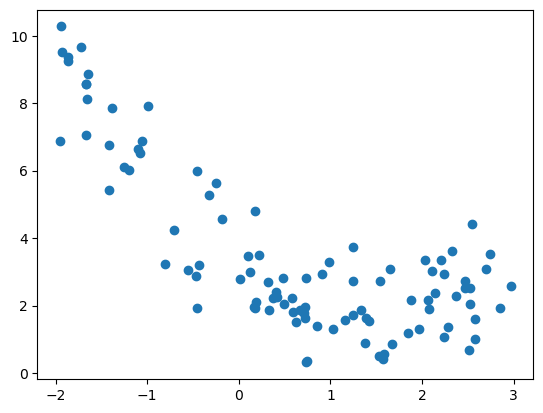

In [27]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1,x2)

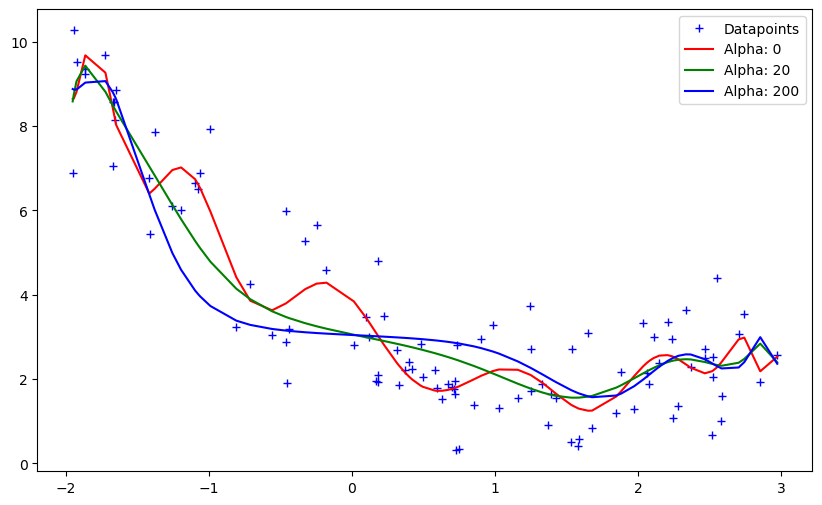

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])

    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha , c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label = 'Alpha: {}'.format(alpha))

plt.legend()
plt.show()